In [1]:
# configure plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable #for subplot colorbars
from matplotlib.pyplot import cm

%config InlineBackend.rc = {'figure.dpi': 300, 'savefig.dpi': 300, \
                            'figure.figsize': (6, 6 / 1.6), 'font.size': 8, \
                            'figure.facecolor': (1, 1, 1, 0),'font.sans-serif':'Latin Modern Math'}

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

%matplotlib inline

#dark plotting
# plt.style.use('dark_background')

In [2]:
import numpy as np

In [3]:
def make_time(sample_frequency,sample_time):
    
    sample_number = int(sample_frequency * sample_time) #number of samples is the produce ot sample frequency and total measurement time
    
    taxis = np.linspace(0,1,sample_frequency) #make a vector from 0 to 1s in increments of sample number in units of s
    dt = taxis[1]-taxis[0] # sample spacing
    # dt is also simply 1/sample rate
    taxis = np.arange(0,sample_time,dt)
    
    return taxis

# Reading vibrometer outputs

In [4]:
import os
import glob
import natsort
import numpy as np

In [5]:
def mirror_complex_fft(complex_fft):
    
    fft_vector = (complex_fft) #/ len(faxis)  #making a fft vector of complex -- should some scaling go in here to correct for polytec yscale?
    fft_vector_copy = fft_vector.copy() #making a copy of the fft vector
    fft_mirrored = fft_vector_copy[::-1] #flipping such that vectors starta with most negative frequencies
    fft_joined = np.append(fft_vector,fft_mirrored) #appending both vectors

    return fft_joined

In [6]:
def load_vibrometer_scan(path,extension):
    "this function takes a vibrometer output text file and creates a"
    "complex-valued array of the fft. also mirrors these data for proper formatting to ifft functions"
    
    #loading files names
    os.chdir(path)
    file_names = []
    
    for name in glob.glob(extension):
        file_names.append(name)
        
    file_names = natsort.natsorted(file_names, reverse=False)

###############################################################################
    fbins = [[] for _ in range(len(file_names))]
    fft_mag = [[] for _ in range(len(file_names))]

    for scan_point in range(len(file_names)):

        #loading a .txt file, only the numerical data and not the header info
        temp = np.loadtxt(file_names[scan_point],skiprows = 7) 
        
        #swapping axes so that data are ordered by columns
        temp = np.swapaxes(temp,0,1) 

        #reading the velocity
        fft_mag[scan_point] = temp[1]

        #reading the time vector
        fbins[scan_point] = temp[0]
###############################################################################    
    #i suppose i could retrieve the complex, un-mirrored fft -- but for now the ifft is important so i will take only the mirrored
    return np.asarray(fbins),np.asarray(fft_mag)

# Loading data

In [7]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.01V/'
extension = 'sweep_0-01V*.txt'

fbins_0_01V,fft_mag_0_01V = load_vibrometer_scan(path,extension)

In [8]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.02V/'
extension = 'sweep_0-02V*.txt'

fbins_0_02V,fft_mag_0_02V = load_vibrometer_scan(path,extension)

In [9]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.03V/'
extension = 'sweep_0-03V*.txt'

fbins_0_03V,fft_mag_0_03V = load_vibrometer_scan(path,extension)

In [10]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.04V/'
extension = 'sweep_0-04V*.txt'

fbins_0_04V,fft_mag_0_04V = load_vibrometer_scan(path,extension)

In [11]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.05V/'
extension = 'sweep_0-05V*.txt'

fbins_0_05V,fft_mag_0_05V = load_vibrometer_scan(path,extension)

In [12]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.06V/'
extension = 'sweep_0-06V*.txt'

fbins_0_06V,fft_mag_0_06V = load_vibrometer_scan(path,extension)

In [13]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.07V/'
extension = 'sweep_0-07V*.txt'

fbins_0_07V,fft_mag_0_07V = load_vibrometer_scan(path,extension)

In [14]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.08V/'
extension = 'sweep_0-08V*.txt'

fbins_0_08V,fft_mag_0_08V = load_vibrometer_scan(path,extension)

In [15]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.09V/'
extension = 'sweep_0-09V*.txt'

fbins_0_09V,fft_mag_0_09V = load_vibrometer_scan(path,extension)

In [16]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.09V/'
extension = 'sweep_0-09V*.txt'

fbins_0_09V,fft_mag_0_09V = load_vibrometer_scan(path,extension)

In [17]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/0.1V/'
extension = 'sweep_0-10V*.txt'

fbins_0_1V,fft_mag_0_1V = load_vibrometer_scan(path,extension)

In [18]:
path ='/Volumes/Extreme Pro/Projects/Vibrometer/Data/2024_04/FrequencySweep/sweep_noise/'
extension = 'sweep_noise*.txt'

fbins_noise,fft_mag_noise = load_vibrometer_scan(path,extension)

# Noise

Here I am plotting the fft(v) for the surface of the shaker when **no** current is applied; this is effectively a noise floor measurement. In red is the mean.

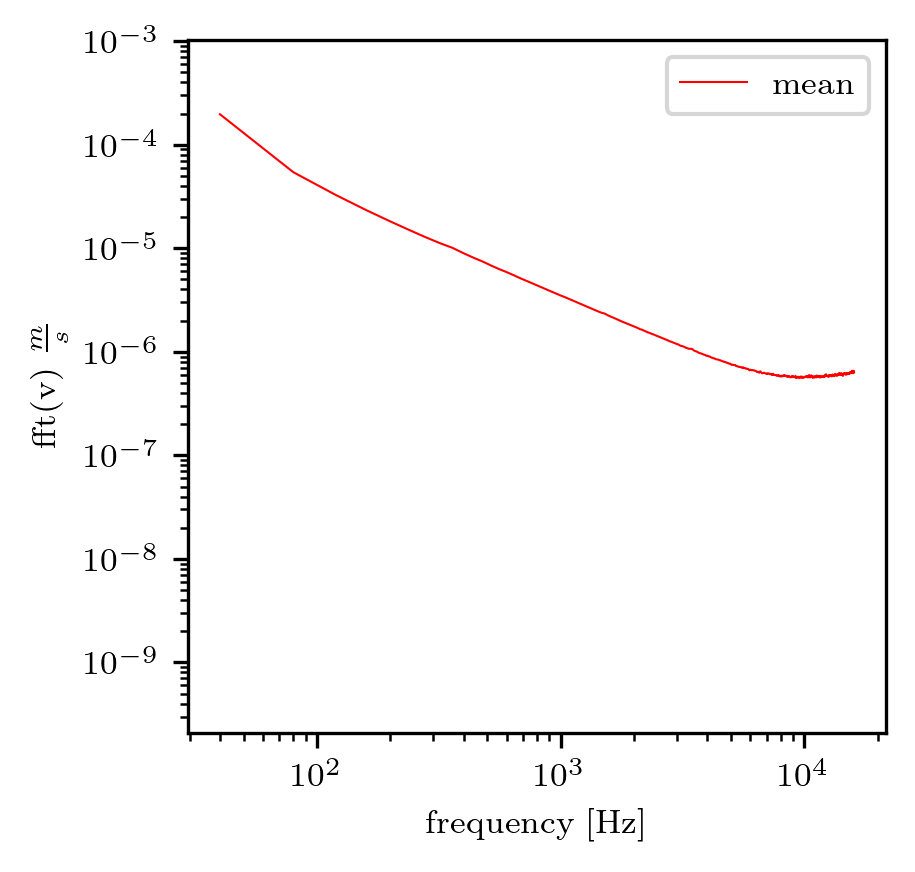

In [19]:
noise_mean = np.mean(fft_mag_noise,axis = 0)

fig = plt.figure(figsize=(3, 3))
ax1 = plt.subplot(111)


for sp in range(fft_mag_noise.shape[0]):
    ax1.plot(fbins_noise[0],fft_mag_noise[sp],'w',alpha = 0.01)

ax1.plot(fbins_noise[0],noise_mean,'r',linewidth = 0.5,label = 'mean')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel(r'fft(v) $\frac{m}{s}$')

ax1.legend()

# Smooth

The next step is to apply a smoothing filter. 

In [20]:
def smooth(fft_bins,fft_mag):

    fft_mag_smoothed = [[] for _ in range(fft_mag.shape[0])] #making an empty list for smoothed fft
    
    kernel_size = 20
    kernel = np.ones(kernel_size) / kernel_size
    
    for scan_point in range(fft_mag.shape[0]):
        fft_mag_smoothed[scan_point] = np.convolve(fft_mag[scan_point],kernel, mode='same')
    
    return np.asarray(fft_mag_smoothed)

In [21]:
fft_mag_0_01V_smooth = smooth(fbins_0_01V,fft_mag_0_01V)
fft_mag_0_02V_smooth = smooth(fbins_0_02V,fft_mag_0_02V)
fft_mag_0_03V_smooth = smooth(fbins_0_03V,fft_mag_0_03V)
fft_mag_0_04V_smooth = smooth(fbins_0_04V,fft_mag_0_04V)
fft_mag_0_05V_smooth = smooth(fbins_0_05V,fft_mag_0_05V)
fft_mag_0_06V_smooth = smooth(fbins_0_06V,fft_mag_0_06V)
fft_mag_0_07V_smooth = smooth(fbins_0_07V,fft_mag_0_07V)
fft_mag_0_08V_smooth = smooth(fbins_0_08V,fft_mag_0_08V)
fft_mag_0_09V_smooth = smooth(fbins_0_09V,fft_mag_0_09V)
fft_mag_0_1V_smooth = smooth(fbins_0_1V,fft_mag_0_1V)

smoothed_noise = smooth(fbins_noise,fft_mag_noise)

In [22]:
smoothed_noise_avg = np.mean(smoothed_noise,axis = 0)

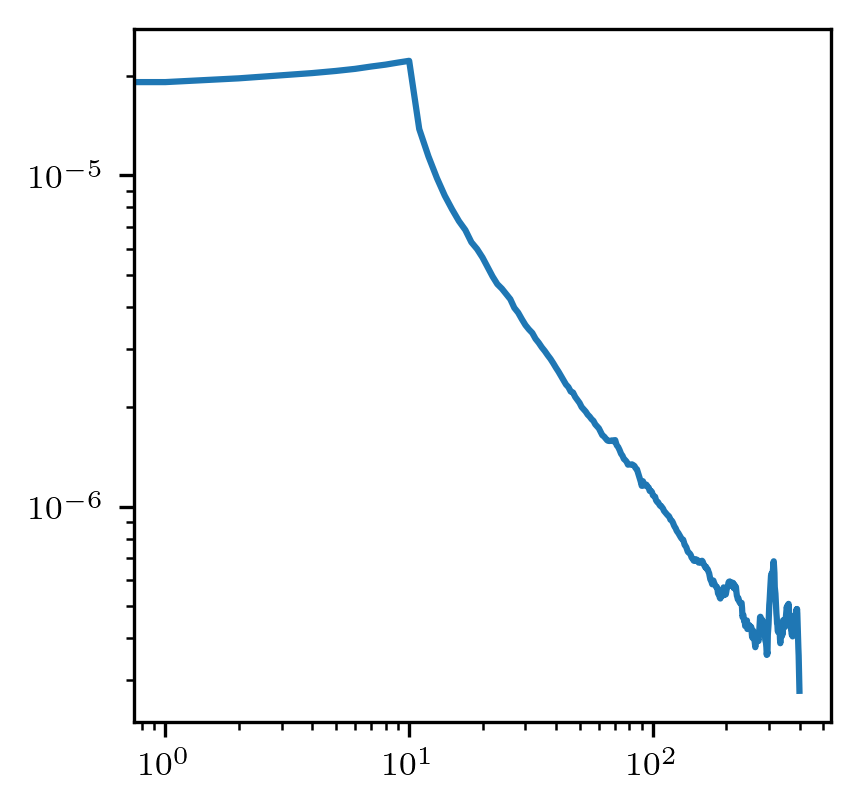

In [23]:
fig = plt.figure(figsize=(3, 3))
ax1 = plt.subplot(111)

ax1.plot(fft_mag_0_01V_smooth[140])
ax1.set_xscale("log")
ax1.set_yscale("log")

# Detrend

In [24]:
##  might need to normalize between 1 and 0

In [25]:
from scipy.optimize import curve_fit

# def f(x, a, b,c): # this is your 'straight line' y=f(x)
#     return a*(x**b)

def f(x, m, c, c0):
    return c0 + x**m * c
    
def remove_fit(xdata,ydata):
    popt, pcov = curve_fit(f, xdata,ydata) # your data x, y to fit
    y_fit = f(xdata,*popt)
    return ydata - y_fit

def remove_trend(fft_mag,fbins):
    
    detrended = [[] for _ in range(fft_mag.shape[0])]
    
    for scan_point in range(fft_mag.shape[0]):
        detrended[scan_point] = remove_fit(fbins[scan_point],fft_mag[scan_point])

    return np.asarray(detrended)

NameError: name 'test' is not defined

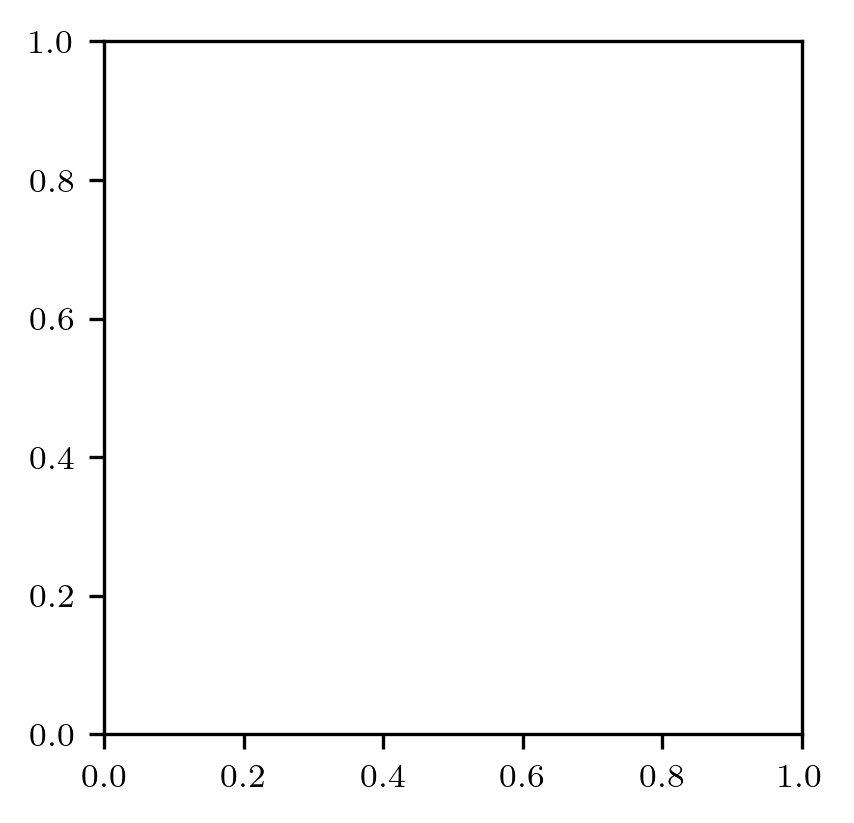

In [26]:
fig = plt.figure(figsize=(3, 3))
ax1 = plt.subplot(111)

ax1.plot(test[90])
# ax1.set_xscale("log")
# ax1.set_yscale("log")

In [ ]:
xdata = fbins_0_01V[0]
ydata = fft_mag_0_1V_smooth_mean

popt, pcov = curve_fit(f, xdata,ydata) # your data x, y to fit
y_fit = f(xdata,*popt)

NameError: name 'xdata' is not defined

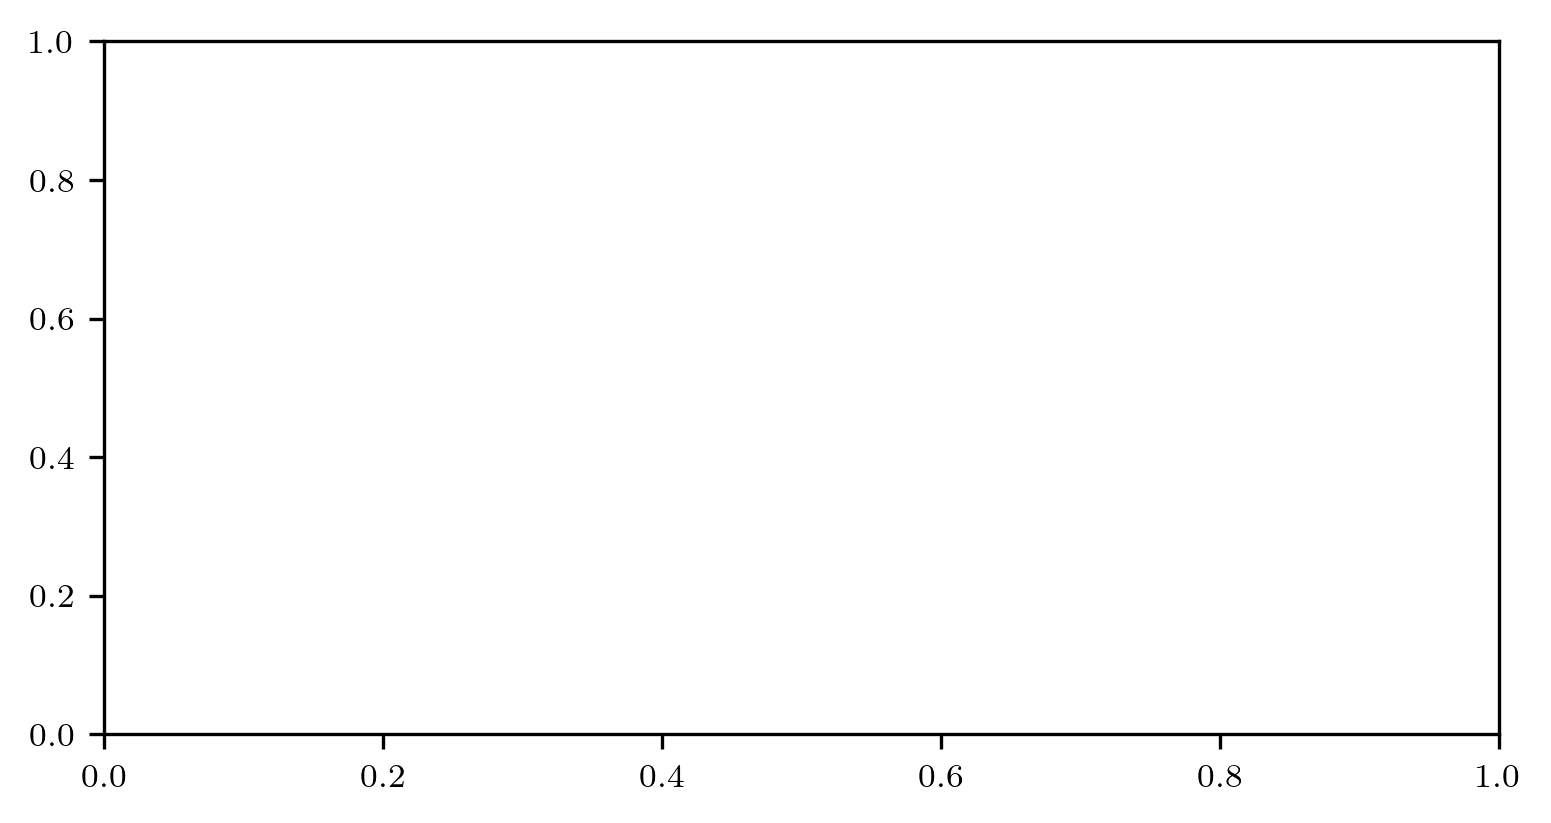

In [27]:
fig = plt.figure(figsize=(6, 3))
ax1 = plt.subplot(111)

# ax1.plot(xdata,ydata)
# ax1.plot(xdata,y_fit)
ax1.plot(xdata,ydata - y_fit)

ax1.set_xscale('log')
# ax1.set_yscale('log')

# find peaks

In [28]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(data_convolved,prominence=1e-2)      # BEST!

NameError: name 'data_convolved' is not defined

NameError: name 'data' is not defined

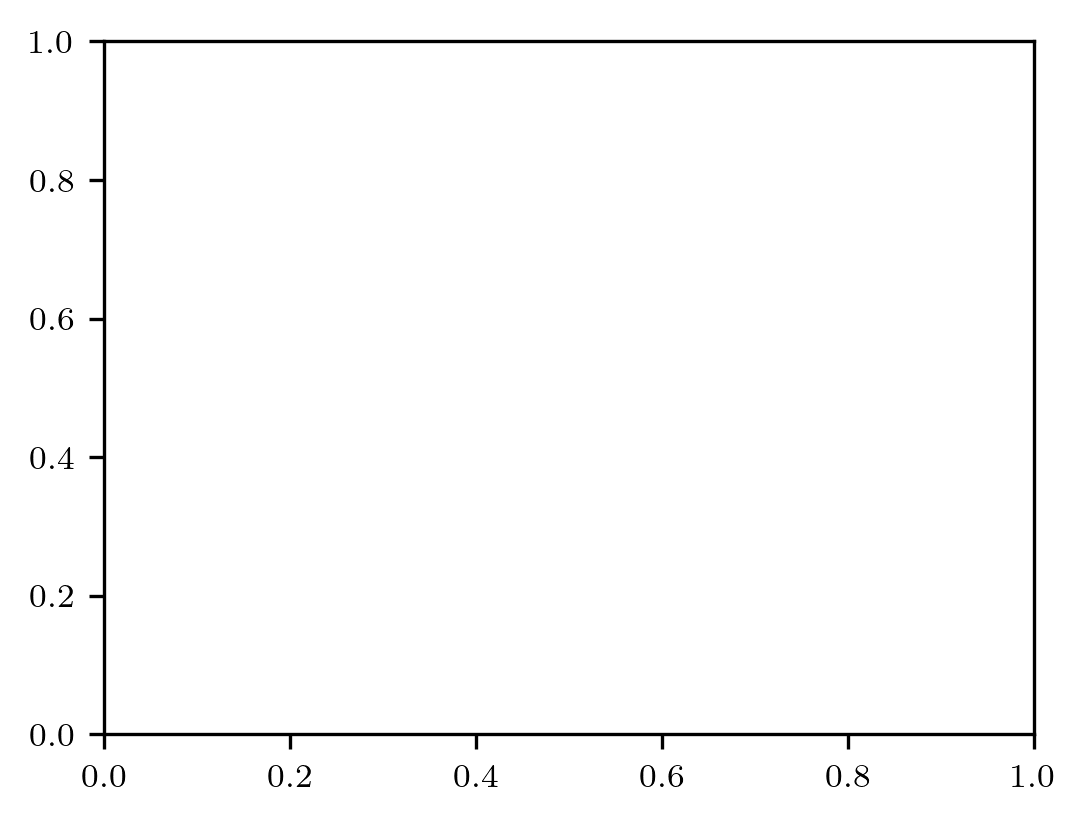

In [29]:
fig = plt.figure(figsize=(4, 3))
ax1 = plt.subplot(111)

ax1.plot(data)
ax1.plot(data_convolved)
ax1.plot(peaks,data_convolved[peaks],'x')

ax1.set_yscale('log')
# ax1.set_xscale('log')

In [30]:
def find_peaks(fbins,fft_mag):
    
    diff = np.diff(fft_mag)
    
    fft_mag_max = np.max(fft_mag,axis = 1) #finding the maximum value of each fft
    fft_mag_argmax = np.argmax(fft_mag,axis = 1) #finding the argument of the maximum value of the fft
    fft_mag_argmax = fbins[0][fft_mag_argmax] #finding the bin of the maximum value
    
    return fft_mag_argmax, fft_mag_max

In [31]:
fft_mag_argmax_0_01V,fft_mag_max_0_01V = find_peaks(fbins_0_01V,fft_mag_0_01V)
fft_mag_argmax_0_02V,fft_mag_max_0_02V = find_peaks(fbins_0_02V,fft_mag_0_02V)
fft_mag_argmax_0_03V,fft_mag_max_0_03V = find_peaks(fbins_0_03V,fft_mag_0_03V)
fft_mag_argmax_0_04V,fft_mag_max_0_04V = find_peaks(fbins_0_04V,fft_mag_0_04V)
fft_mag_argmax_0_05V,fft_mag_max_0_05V = find_peaks(fbins_0_05V,fft_mag_0_05V)
fft_mag_argmax_0_06V,fft_mag_max_0_06V = find_peaks(fbins_0_06V,fft_mag_0_06V)
fft_mag_argmax_0_07V,fft_mag_max_0_07V = find_peaks(fbins_0_07V,fft_mag_0_07V)
fft_mag_argmax_0_08V,fft_mag_max_0_08V = find_peaks(fbins_0_08V,fft_mag_0_08V)
fft_mag_argmax_0_09V,fft_mag_max_0_09V = find_peaks(fbins_0_09V,fft_mag_0_09V)
fft_mag_argmax_0_1V,fft_mag_max_0_1V = find_peaks(fbins_0_1V,fft_mag_0_1V)

In [32]:
from scipy.signal import find_peaks

x = fft_mag[scan_point][2:]-y_fit[2:]
# x = x / np.max(x)
# x = np.diff(x)
peaks, _ = find_peaks(x, prominence=1e-4)      # BEST!

NameError: name 'fft_mag' is not defined

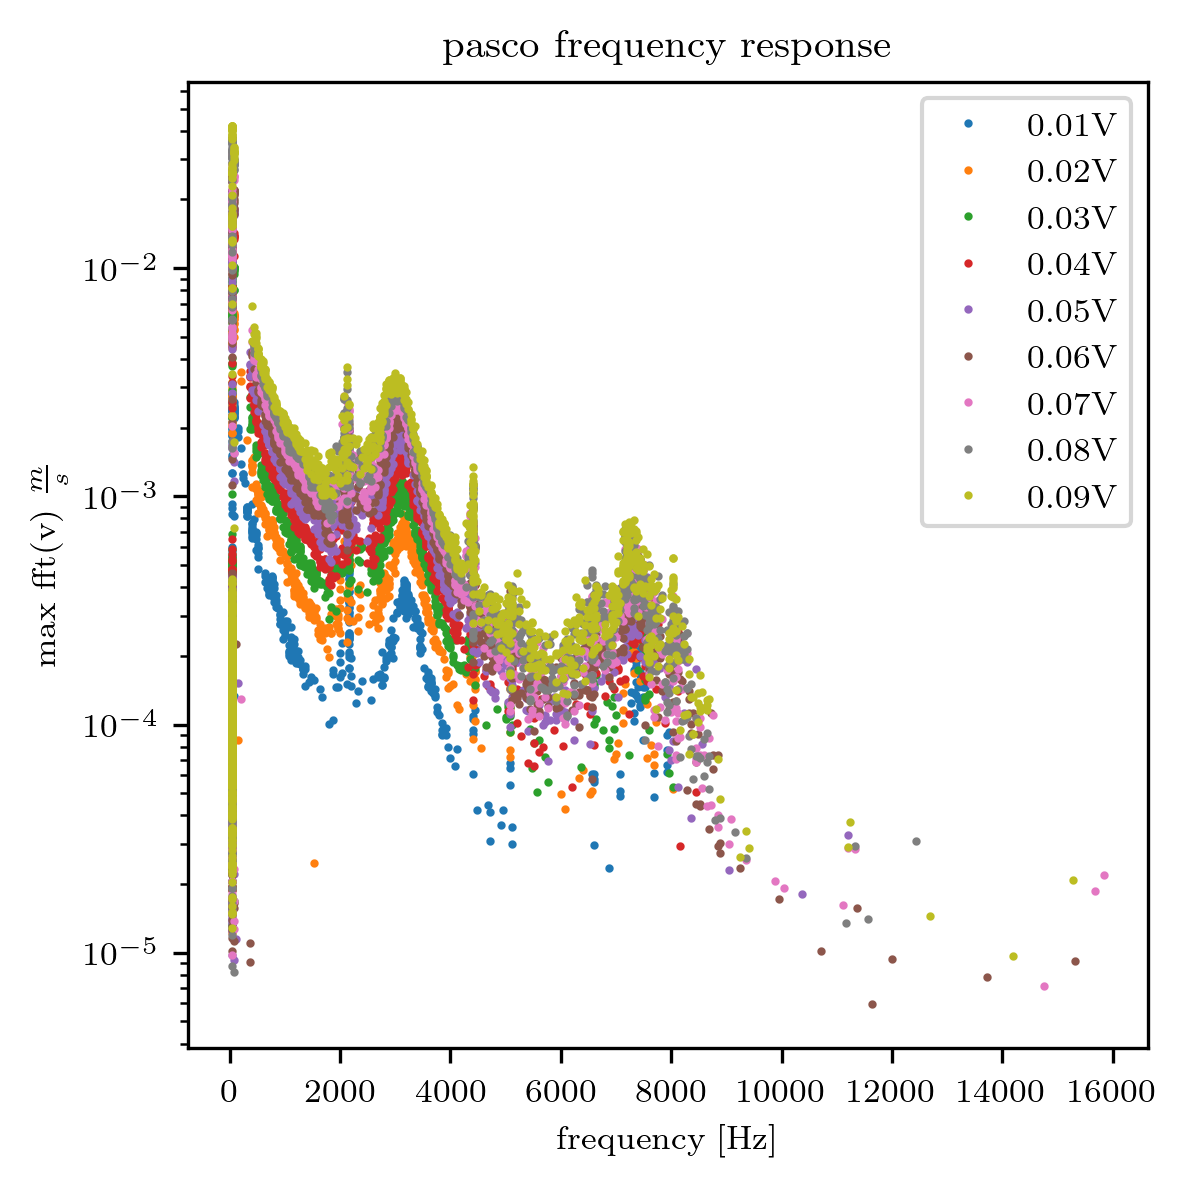

In [38]:
fig = plt.figure(figsize=(4, 4))
ax1 = plt.subplot(111)

ax1.plot(fft_mag_argmax_0_01V,fft_mag_max_0_01V,'o',markersize = 1,label = '0.01V')
ax1.plot(fft_mag_argmax_0_02V,fft_mag_max_0_02V,'o',markersize = 1,label = '0.02V')
ax1.plot(fft_mag_argmax_0_03V,fft_mag_max_0_03V,'o',markersize = 1,label = '0.03V')
ax1.plot(fft_mag_argmax_0_04V,fft_mag_max_0_04V,'o',markersize = 1,label = '0.04V')
ax1.plot(fft_mag_argmax_0_05V,fft_mag_max_0_05V,'o',markersize = 1,label = '0.05V')
ax1.plot(fft_mag_argmax_0_06V,fft_mag_max_0_06V,'o',markersize = 1,label = '0.06V')
ax1.plot(fft_mag_argmax_0_07V,fft_mag_max_0_07V,'o',markersize = 1,label = '0.07V')
ax1.plot(fft_mag_argmax_0_08V,fft_mag_max_0_08V,'o',markersize = 1,label = '0.08V')
ax1.plot(fft_mag_argmax_0_09V,fft_mag_max_0_09V,'o',markersize = 1,label = '0.09V')

ax1.set_yscale('log')
# ax1.set_xscale('log')

ax1.set_title('pasco frequency response')
ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel(r'max fft(v) $\frac{m}{s}$')

ax1.legend()

fig.tight_layout()

plt.savefig("/Volumes/Extreme Pro/Projects/Vibrometer/Figures/frequency_response_shaker" + ".jpg",format="JPG",bbox_inches='tight')

In [33]:
fft_mag = fft_mag_0_01V
fbins = fbins_0_01V

fft_mag_max = np.max(fft_mag,axis = 1)
fft_mag_argmax = np.argmax(fft_mag,axis = 1)
fft_mag_argmax = fbins[0][fft_mag_argmax]

In [34]:
## single

data = fft_mag_0_01V[90]
data = data/np.max(data)

kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size
data_convolved = np.convolve(data, kernel, mode='same')


# all curves
fft_mag = fft_mag_0_01V
fft_bins = fbins_0_01V

fft_mag_smoothed = [[] for _ in range(fft_mag.shape[0])] #making an empty list for smoothed fft


kernel_size = 10
kernel = np.ones(kernel_size) / kernel_size

for scan_point in range(fft_mag.shape[0]):
    fft_mag_smoothed[scan_point] = np.convolve(fft_mag[scan_point],kernel, mode='same')

fft_mag_smoothed = np.asarray(fft_mag_smoothed)